In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import read_params_and_metrics, graficar_correlacion

id = ["name", "run_uuid"]
architecture = [
    "arc_num_conv1",
    "arc_num_layers",
    "arc_num_conv2",
    "arc_latent_dim",
    "arc_latent_volume",
    "arc_skip",
    "arc_encoder_blocks",
]

train = ["train_loss", "train_Accuracy", "train_Accuracy_seq"]

valid = ["valid_loss", "valid_Accuracy", "valid_Accuracy_seq"]

test = [
    "test_loss",
    "test_Accuracy",
    "test_Accuracy_seq",
]

columns = id + architecture + train + valid + test

In [7]:
BASE_PATH = "/home/guillermo/Documents/SINC/Research/RNA/analysis/AEseq2seq/"
v4p = "notebooks/from_db/Unet/selection/v4p/"
v4p_e1 = "notebooks/from_db/Unet/selection/v4p_e1/"

In [8]:
v4p, me2 = read_params_and_metrics(BASE_PATH, v4p, columns)
v4p_e1, me1 = read_params_and_metrics(BASE_PATH, v4p_e1, columns)

In [9]:
data = pd.concat([v4p, v4p_e1])

<Axes: xlabel='step', ylabel='valid_Accuracy'>

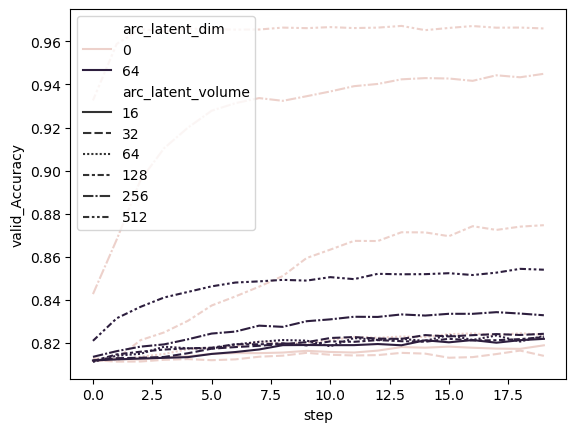

In [19]:
sns.lineplot(
    data=me1[me1["arc_skip"] == 0],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_dim",
    style="arc_latent_volume",
)

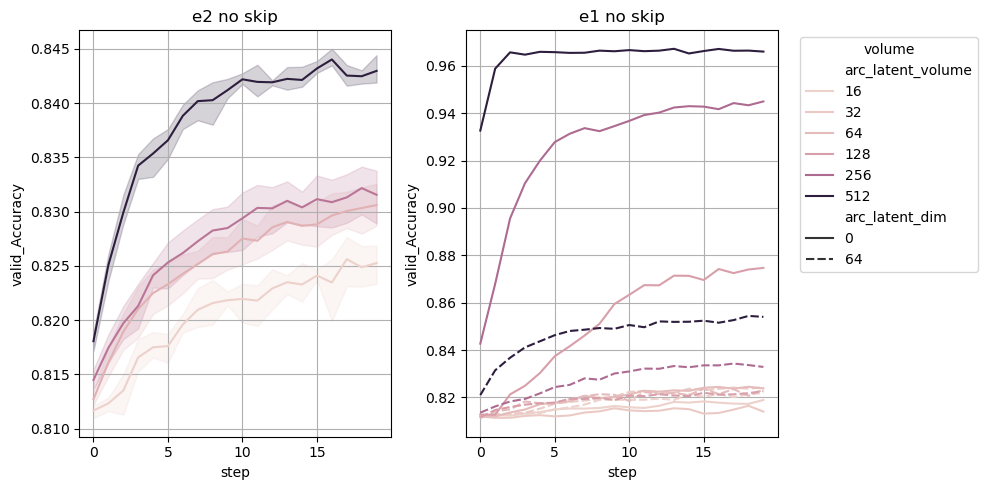

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[1].set_title("e1 no skip")
sns.lineplot(
    data=me1[me1["arc_skip"] == 0],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    style="arc_latent_dim",
    ax=ax[1],
)

ax[0].set_title("e2 no skip")
sns.lineplot(
    data=me2[me2["arc_skip"] == 0],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    style="arc_latent_dim",
    ax=ax[0],
    legend=False,
)
ax[1].legend(title="volume", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)
fig.tight_layout()

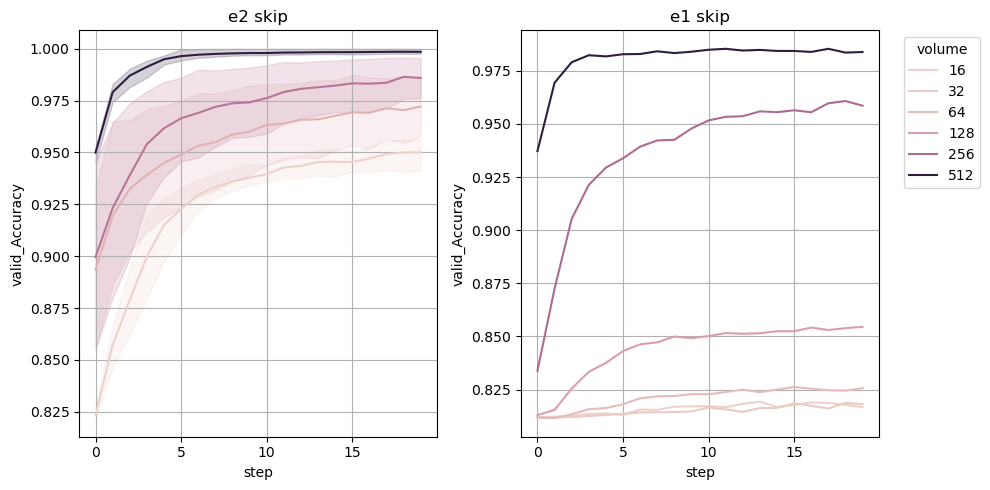

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[1].set_title("e1 skip")
sns.lineplot(
    data=me1[me1["arc_skip"] == 1],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    ax=ax[1],
)

ax[0].set_title("e2 skip")
sns.lineplot(
    data=me2[me2["arc_skip"] == 1],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    ax=ax[0],
    legend=False,
)
ax[1].legend(title="volume", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)
fig.tight_layout()